In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading dataset
file_path = "Chocolate Sales (2).csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [ ]:
# Cleaning the Amount column (removing $ and commas, converting to float)
df["Amount"] = df["Amount"].replace(r'[\$,]', '', regex=True).astype(float)

In [ ]:
# Converting Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [7]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


# 1. Total Sales by Product

In [ ]:
# Visualization 1: Bar Chart (Total Sales by Product)
sales_by_product = df.groupby("Product")["Amount"].sum()

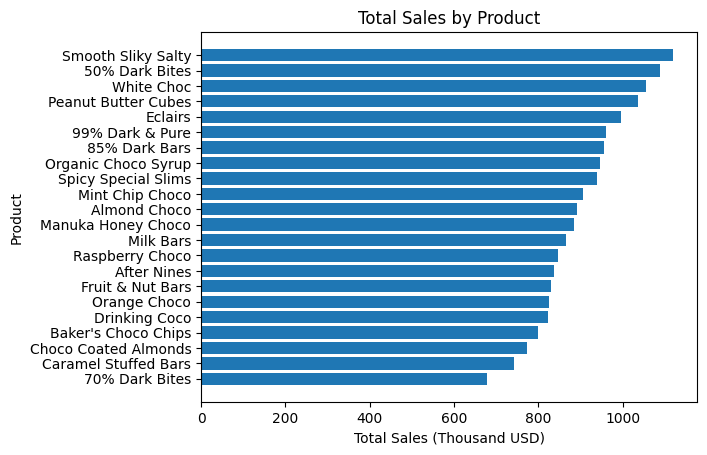

In [ ]:
# Sort and convert to thousands
sales_by_product = sales_by_product.sort_values(ascending=False) / 1_000 # for easy understanding of visuals

fig, ax = plt.subplots()

ax.barh(sales_by_product.index, sales_by_product.values)
ax.set_title("Total Sales by Product")
ax.set_xlabel("Total Sales (Thousand USD)")
ax.set_ylabel("Product")

ax.invert_yaxis()

plt.show()

# 2. Monthly Sales Trend

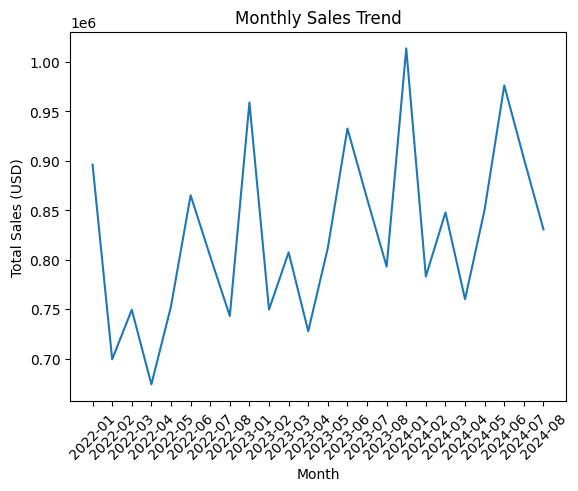

In [ ]:
#Visualization 2: Line Chart (Monthly Sales Trend)
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
fig, ax = plt.subplots()
ax.plot(monthly_sales.index.astype(str), monthly_sales.values)
ax.set_title("Monthly Sales Trend")
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

# 3. Box Shipped vs Sales Amount

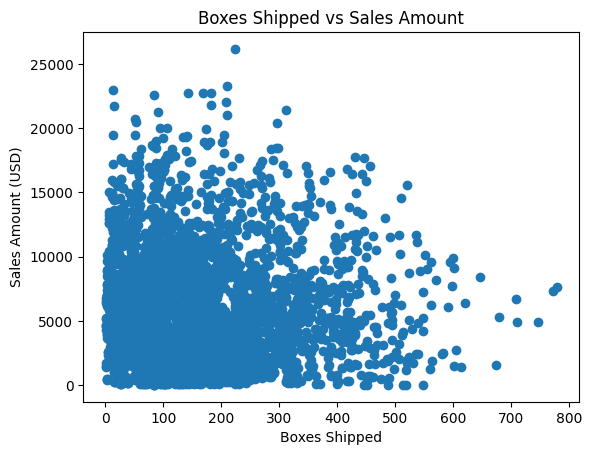

In [ ]:
#Visualization 3: Scatter Plot (Boxes Shipped vs Sales Amount)
fig, ax = plt.subplots()
ax.scatter(df["Boxes Shipped"], df["Amount"])
ax.set_title("Boxes Shipped vs Sales Amount")
ax.set_xlabel("Boxes Shipped")
ax.set_ylabel("Sales Amount (USD)")
plt.show()